# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

In [22]:
#T - Statistic represents
#Difference Between Means:

#The t-statistic quantifies the difference between the sample means of the two groups relative to the variability in the samples.
#A larger absolute value of the t-statistic indicates a greater difference between the group means.

#The negative sign indicates that the mean weight loss for Diet 1 is less than the mean weight loss for Diet 2.

import numpy as np
from scipy.stats import ttest_ind

diet1= np.array([2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5])
diet2= np.array([3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2])
t_statistics,pvalue = ttest_ind(diet1, diet2)
print("The t-statistic : ", f"{t_statistics:.2f}", "gives a very low p-value of :", f"{pvalue:.4f}","is much smaller than 0.05, we conclude that there is a significant difference between the two groups")


The t-statistic :  -3.54 gives a very low p-value of : 0.0041 is much smaller than 0.05, we conclude that there is a significant difference between the two groups


## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

The f-statistics:  20.3158 p_value 0.0001 In order to know which fertilizer is better than another, we can conduct a post-hoc test 
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    F1     F2      1.8 0.0099 0.4572 3.1428   True
    F1     F3      3.2 0.0001 1.8572 4.5428   True
    F2     F3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------
Fertilizer 3 is better than Fertilizer 1 and Fertilizer 2 because Fertilizer 3 has the highest mean


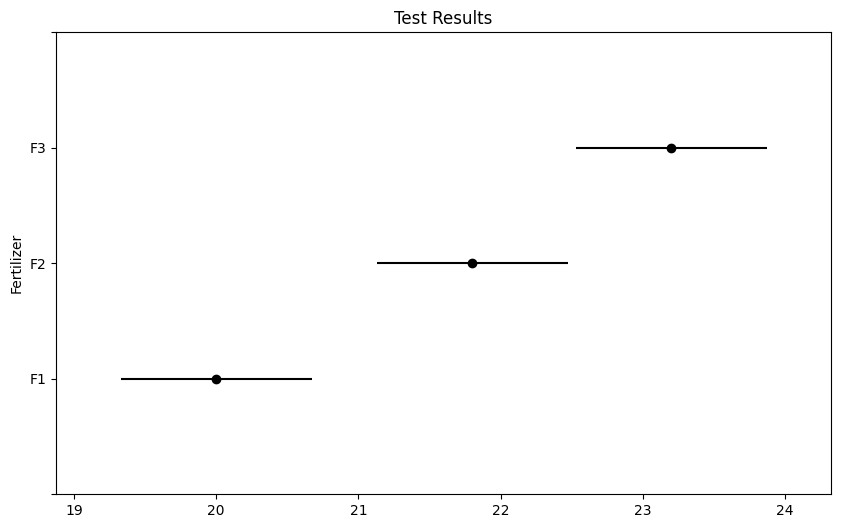

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

fertilizer_1 = np.array([20,21,20,19,20])
fertilizer_2 = np.array([22,21,23,22,21])
fertilizer_3 = np.array([24,23,22,23,24])

f_stat, p_value = f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)

print("The f-statistics: ",f"{f_stat:.4f}", "p_value",f"{p_value:.4f}", "In order to know which fertilizer is better than another, we can conduct a post-hoc test ")

yields = np.concatenate([fertilizer_1, fertilizer_2, fertilizer_3])

labels = np.repeat(['F1', 'F2', 'F3'], repeats=5)

data = pd.DataFrame({'yield': yields, 'fertilizer': labels})

tukey = pairwise_tukeyhsd(data['yield'], data['fertilizer'], alpha=0.05)
print(tukey)
print("Fertilizer 3 is better than Fertilizer 1 and Fertilizer 2 because Fertilizer 3 has the highest mean")

fig = tukey.plot_simultaneous(ylabel="Fertilizer")
plt.title("Test Results")
plt.show()